# SUPPORT VECTOR MACHINE

Data set Description described in another document “Drug Response Classification”
### Task 1: Exploratory Data Analysis (EDA)
1.	Load the dataset and perform fundamental data exploration.
2.	Utilize histograms, box plots, or density plots to understand feature distributions.
3.	Investigate feature correlations to discern relationships within the data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC



In [4]:
# ---------------------------------------------------------
# Load Data + Exploratory Data Analysis (EDA)
# ---------------------------------------------------------

df = pd.read_csv("Pharma_Industry.csv")
df.head()


,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [6]:
df.describe()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000
mean,-0.037761,0.214957,0.062871,0.054398,-0.171863,0.5200
std,0.979891,1.247567,0.971978,0.986001,0.983765,0.5001
min,-3.019512,-3.773897,-2.940389,-3.401277,-3.110431,0.0000
25%,-0.642003,-0.565168,-0.648157,-0.586085,-0.797715,0.0000
50%,-0.019340,0.201532,0.027732,-0.065661,-0.108106,1.0000
75%,0.641151,0.951375,0.710774,0.633914,0.513555,1.0000
max,2.949094,4.111751,3.193108,3.373269,2.518023,1.0000


In [10]:
X_vars=df[['Drug Dosage (mg)','Systolic Blood Pressure (mmHg)','Heart Rate (BPM)','Liver Toxicity Index (U/L)','Blood Glucose Level (mg/dL)']]
Y=df['Drug Response']

In [11]:
Y

0      1
1      1
2      0
3      1
4      1
      ..
495    0
496    1
497    1
498    0
499    1
Name: Drug Response, Length: 500, dtype: int64

In [12]:
X_vars


,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL)
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355
4,0.377100,0.538410,-0.029263,1.896015,-0.960130
...,...,...,...,...,...
495,-1.553759,0.506938,0.817890,-0.661245,-1.345393
496,0.551476,1.714321,0.340589,1.712558,-0.496315
497,-1.072743,-0.221137,0.239247,1.112924,-0.285838
498,1.661259,0.245759,-0.457096,0.633355,0.657413


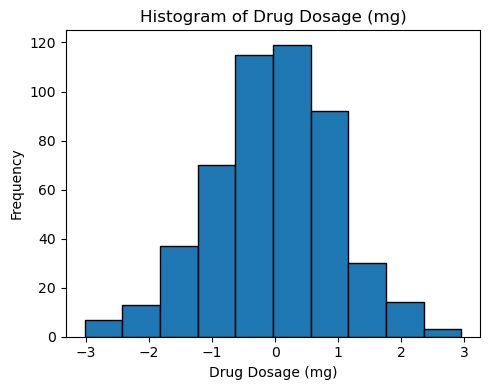

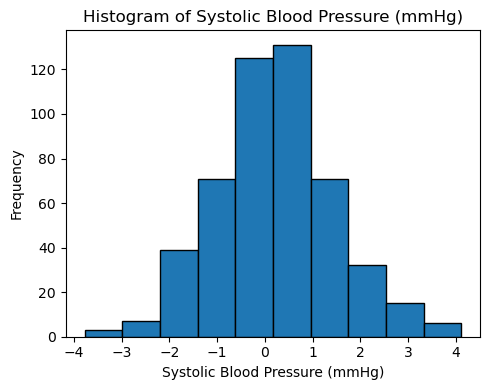

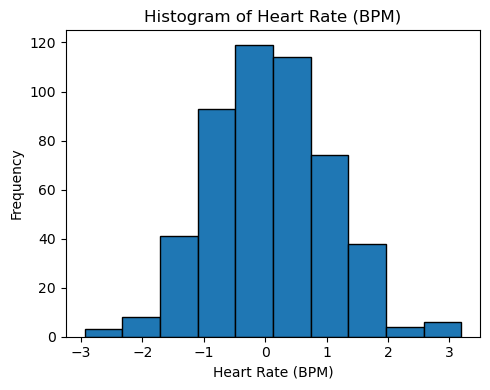

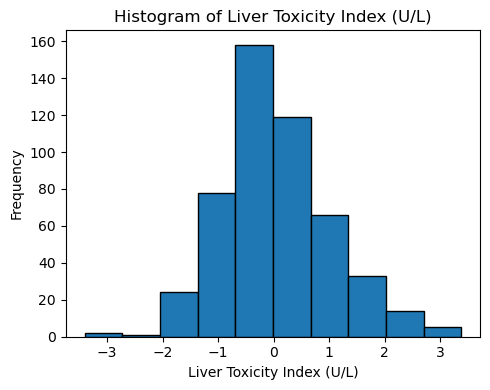

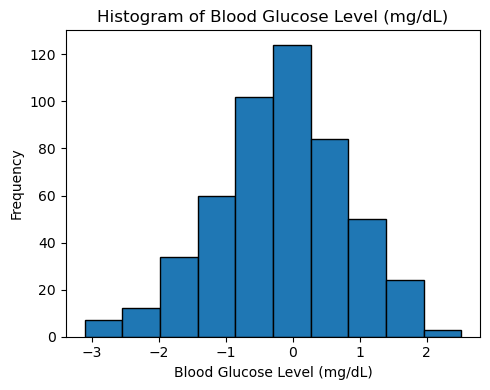

In [13]:
# ---------------------------------------------------
#  HISTOGRAMS 
# ---------------------------------------------------
import matplotlib.pyplot as plt
for col in X_vars.columns:
    plt.figure(figsize=(5, 4))        # create new figure for each plot
    plt.hist(X_vars[col], edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

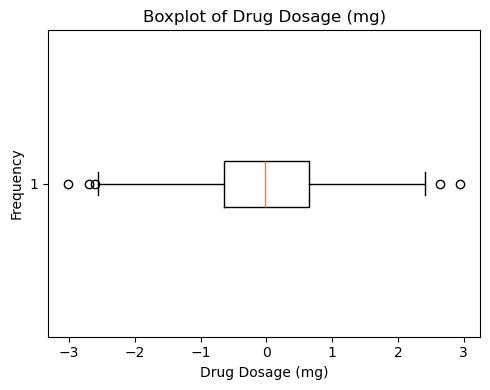

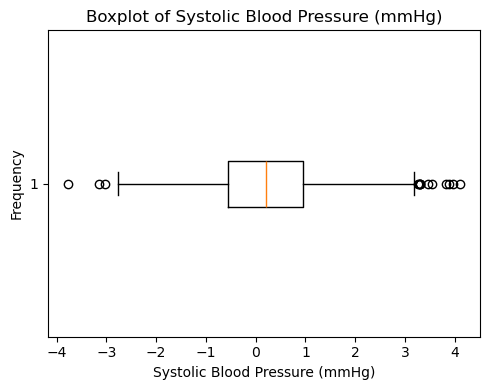

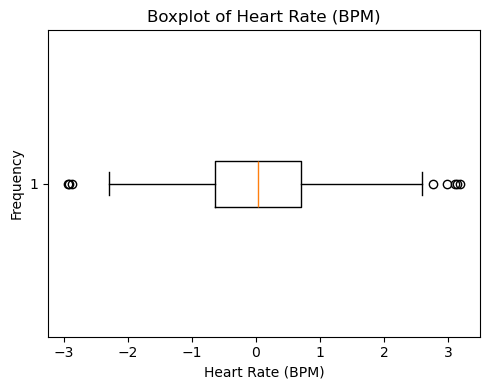

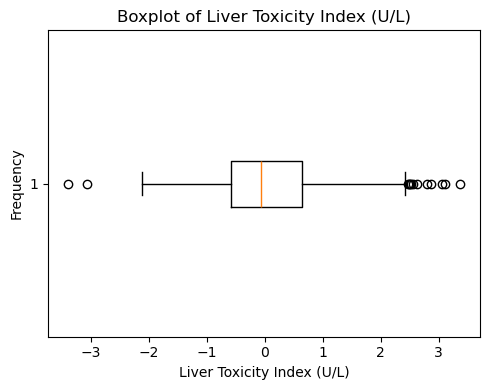

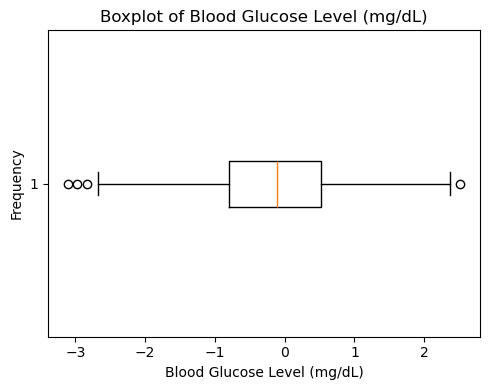

In [14]:
# ---------------------------------------------------
#  Boxplot
# ---------------------------------------------------
import matplotlib.pyplot as plt
for col in X_vars.columns:
    plt.figure(figsize=(5, 4))        
    plt.boxplot(X_vars[col],vert=False)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

In [15]:
df.corr()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
Drug Dosage (mg),1.000000,0.090618,0.040571,0.128127,0.012434,0.043457
Systolic Blood Pressure (mmHg),0.090618,1.000000,-0.039195,0.283672,0.037228,0.305226
Heart Rate (BPM),0.040571,-0.039195,1.000000,0.005818,0.049897,-0.009715
Liver Toxicity Index (U/L),0.128127,0.283672,0.005818,1.000000,0.229474,0.434722
Blood Glucose Level (mg/dL),0.012434,0.037228,0.049897,0.229474,1.000000,0.169342
Drug Response,0.043457,0.305226,-0.009715,0.434722,0.169342,1.000000


### Task 2: Data Preprocessing
1.	Encode categorical variables if necessary.
2.	Split the dataset into training and testing sets.


In [ ]:
## there are no categorical variables in this dataset

In [16]:
X = df.drop("Drug Response", axis=1)
y = df["Drug Response"]


In [17]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

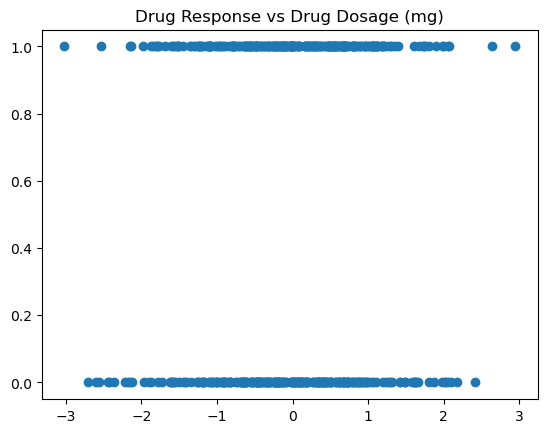

<Figure size 400x400 with 0 Axes>

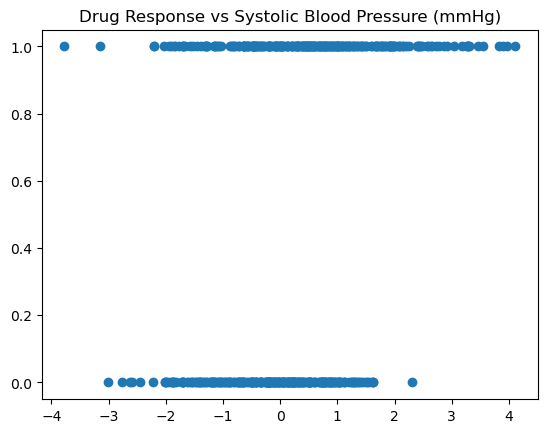

<Figure size 400x400 with 0 Axes>

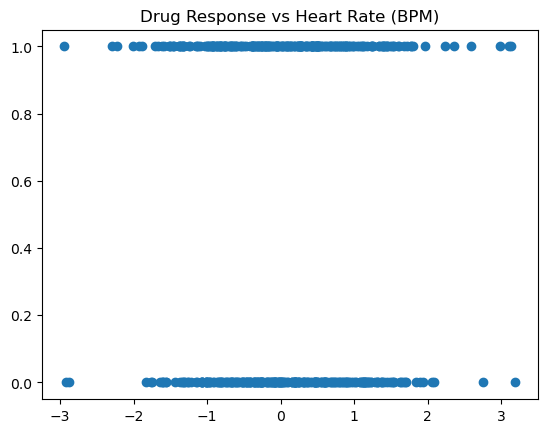

<Figure size 400x400 with 0 Axes>

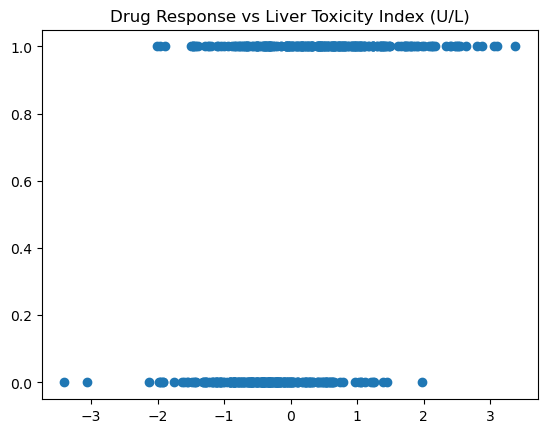

<Figure size 400x400 with 0 Axes>

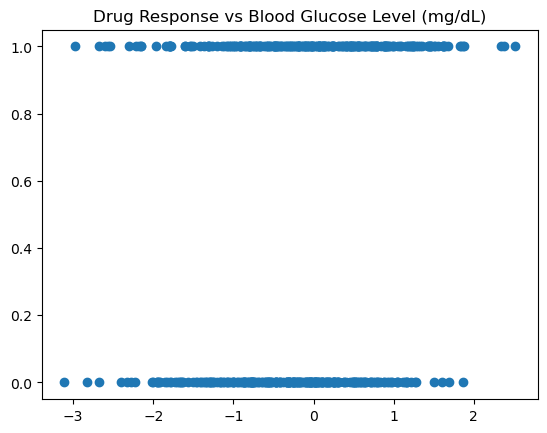

<Figure size 400x400 with 0 Axes>

In [20]:
# ---------------------------------------------------
#  SCATTER PLOT
# ---------------------------------------------------
for col in X_vars:
    plt.scatter(X_vars[col],df["Drug Response"])
    plt.title(f"Drug Response vs {col}")
    plt.figure(figsize=(4,4))
    plt.show()

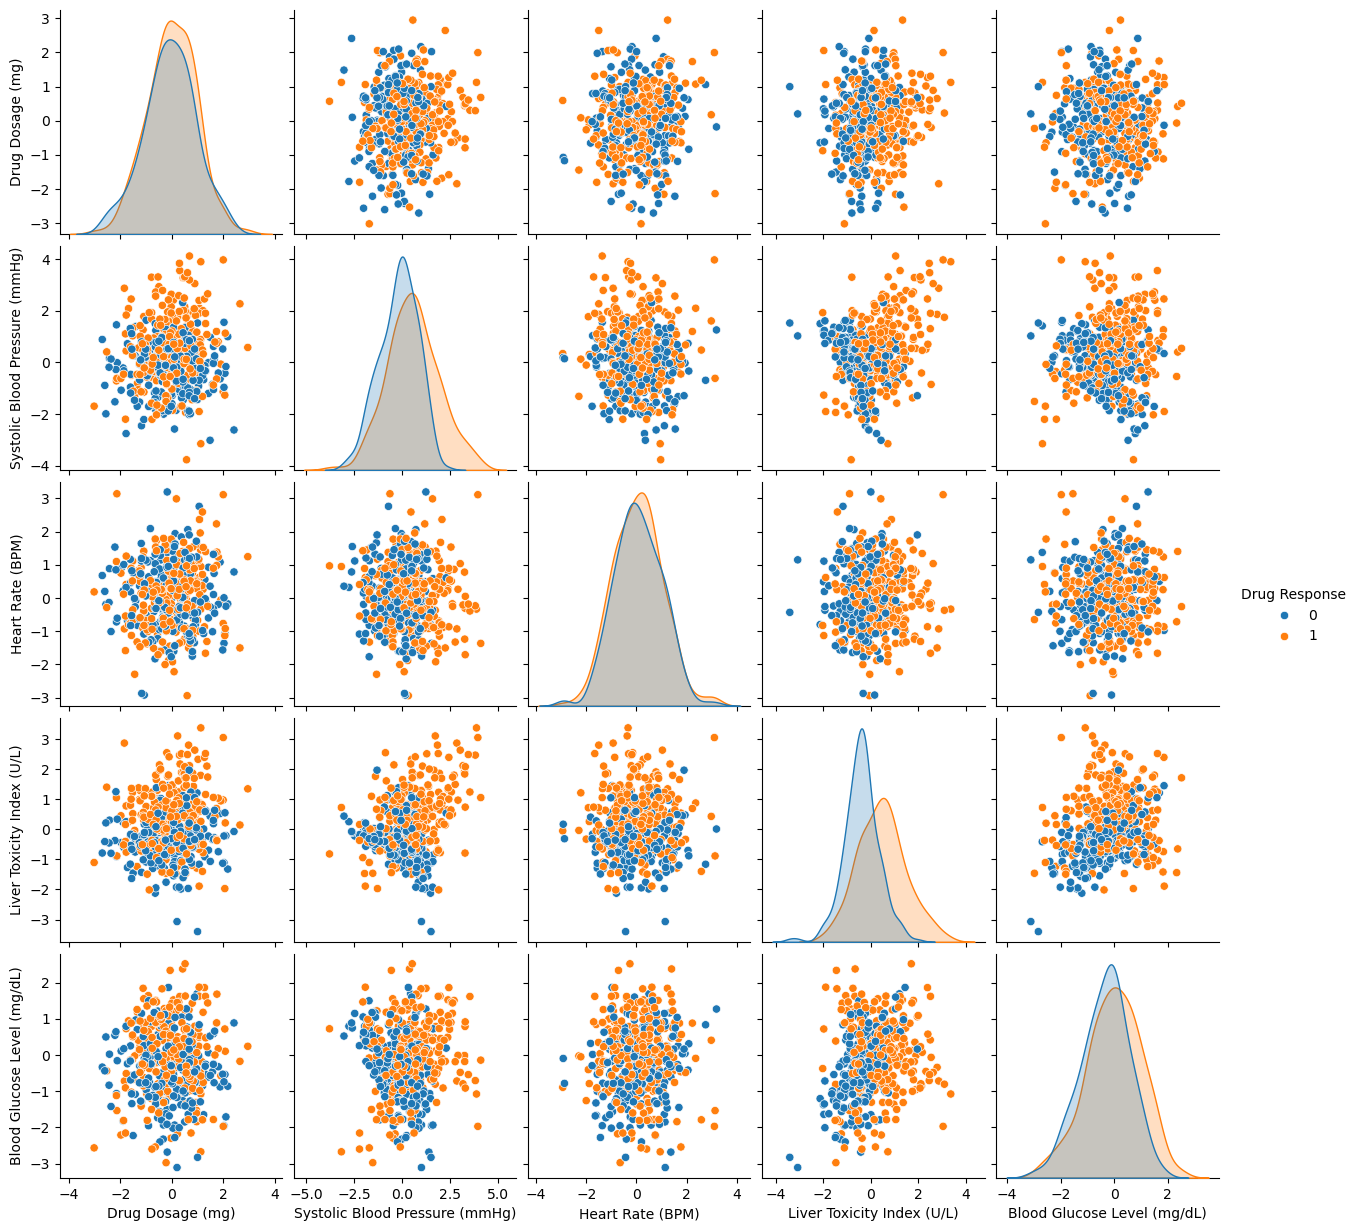

In [21]:
# Pairplot to inspect relationships
sns.pairplot(df, hue="Drug Response")
plt.show()


Class counts:
Drug Response
1    260
0    240
Name: count, dtype: int64

Class percentages:
Drug Response
1    52.0
0    48.0
Name: proportion, dtype: float64


C:\Users\vanam\AppData\Local\Temp\ipykernel_17108\2043638218.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Drug Response", palette="Set2")


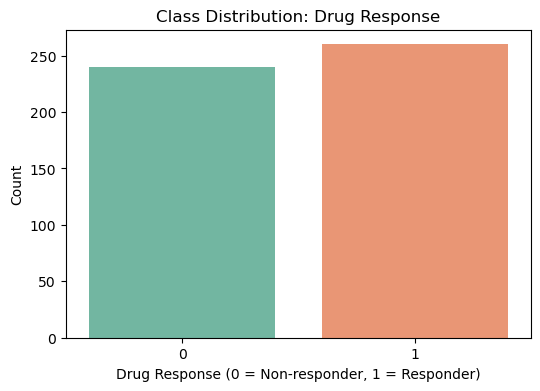

In [23]:

# Simple count of classes
print("Class counts:")
print(df["Drug Response"].value_counts())

print("\nClass percentages:")
print(df["Drug Response"].value_counts(normalize=True) * 100)

# 1. Countplot
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Drug Response", palette="Set2")
plt.title("Class Distribution: Drug Response")
plt.xlabel("Drug Response (0 = Non-responder, 1 = Responder)")
plt.ylabel("Count")
plt.show()

### Task 4: SVM Implementation
1.	Implement a basic SVM classifier using Python libraries like scikit-learn.
2.	Train the SVM model on the training data.
3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).


In [24]:

svm_clf = SVC(kernel="linear")
svm_clf.fit(X_train_scaled, y_train)

y_pred = svm_clf.predict(X_test_scaled)

print("\n--- SVM Performance (Linear Kernel) ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


--- SVM Performance (Linear Kernel) ---
Accuracy: 0.78
Precision: 0.84
Recall: 0.75
F1 Score: 0.7924528301886793


### Task 5: Visualization of SVM Results
1.	Visualize classification results on the testing data.


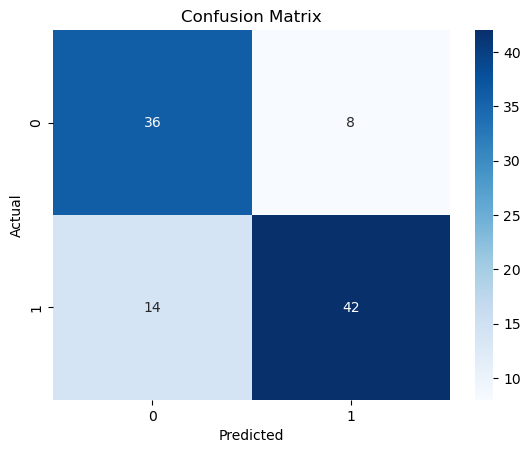

In [25]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Task 6: Parameter Tuning and Optimization
1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.


In [26]:
param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf", "poly"],
    "gamma": ["scale", "auto"]
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring="accuracy")
grid.fit(X_train_scaled, y_train)

print("\n--- Best Parameters from GridSearch ---")
print(grid.best_params_)

best_model = grid.best_estimator_

y_pred_best = best_model.predict(X_test_scaled)

print("\n--- Best Model Accuracy ---")
print("Accuracy:", accuracy_score(y_test, y_pred_best))


--- Best Parameters from GridSearch ---
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

--- Best Model Accuracy ---
Accuracy: 0.84


### Task 7: Comparison and Analysis
1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).
2.	Analyze SVM strengths and weaknesses for the dataset based on EDA and visualization results.
3.	Discuss practical implications of SVM in real-world classification tasks.


In [29]:
kernels = ["linear", "poly", "rbf"]
results = []

for k in kernels:
    print(f"Training SVM with kernel = {k} ...")
    model = SVC(kernel=k, probability=True)
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)

    # Performance metrics
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    results.append([k, acc, prec, rec, f1])

# Create DataFrame
kernel_df = pd.DataFrame(results, columns=["Kernel", "Accuracy", "Precision", "Recall", "F1"])

kernel_df

Training SVM with kernel = linear ...
Training SVM with kernel = poly ...
Training SVM with kernel = rbf ...


,Kernel,Accuracy,Precision,Recall,F1
0,linear,0.78,0.840000,0.750000,0.792453
1,poly,0.71,0.885714,0.553571,0.681319
2,rbf,0.84,0.870370,0.839286,0.854545


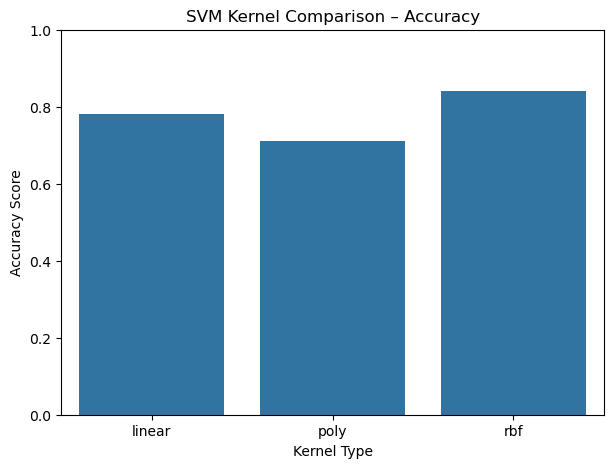

In [30]:
plt.figure(figsize=(7,5))
sns.barplot(data=kernel_df, x="Kernel", y="Accuracy")
plt.title("SVM Kernel Comparison – Accuracy")
plt.ylabel("Accuracy Score")
plt.xlabel("Kernel Type")
plt.ylim(0, 1)
plt.show()

### Strengths of SVM on This Dataset

1. Works well even with relatively small datasets

2. Handles non-linearly separable data (RBF, poly)

3. Performs well with standardized features

4. Robust to outliers (with appropriate C)

### Weaknesses of SVM on This Dataset

1. Sensitive to scaling

2. Hyperparameter tuning is essential

3. Performance may degrade on very large datasets

4. Limited interpretability

### When SVM Is a Strong Choice

1. Medium-sized datasets (1k–100k samples)

2. High-dimensional datasets

3. Non-linear relationships

4. Clear margin separability

### When SVM May Not Be the Best Choice

1. Very large datasets (> 1M samples)

2. When interpretability is essential

3. When features have very different scales

### Real-World Applications

SVMs are widely used in industries where classification accuracy is more important than interpretability:

Field	Example Use Cases

Healthcare Disease prediction, medical diagnostic classification
Finance	Fraud detection, credit scoring
Bioinformatics	Gene classification, drug response prediction
Image Processing	Handwritten digit recognition, face detection
Text/Spam Filtering	Document classification, email spam detection